In [157]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Admin\Airbnb+Data\power bi projects\retail_sales_dataset.csv")

In [158]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [160]:
df["Date"] = pd.to_datetime(df["Date"])

In [161]:
print(df["Date"].dtype)

datetime64[ns]


In [162]:
df.duplicated().sum()

np.int64(0)

In [163]:
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [164]:
df.shape

(1000, 9)

In [165]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df["day"] = df["Date"].dt.day_name()

In [166]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month,day
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,November,Friday
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,February,Monday
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,January,Friday
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,May,Sunday
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,May,Saturday


Text(0, 0.5, 'Total Expense')

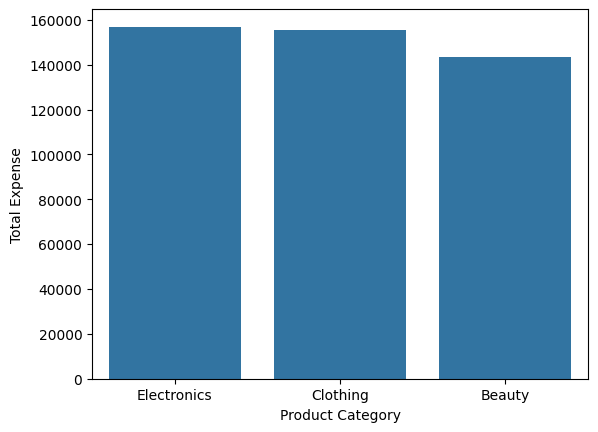

In [167]:
group1 = df.groupby(['Product Category'])['Total Amount'].sum().reset_index().sort_values(by='Total Amount',ascending=False)

sns.barplot(data=group1, x='Product Category', y='Total Amount')
plt.xlabel('Product Category')
plt.ylabel('Total Expense')


# OBSERVATIONS:Electronic have slight high sales compared to clothing and beauty have less sales 

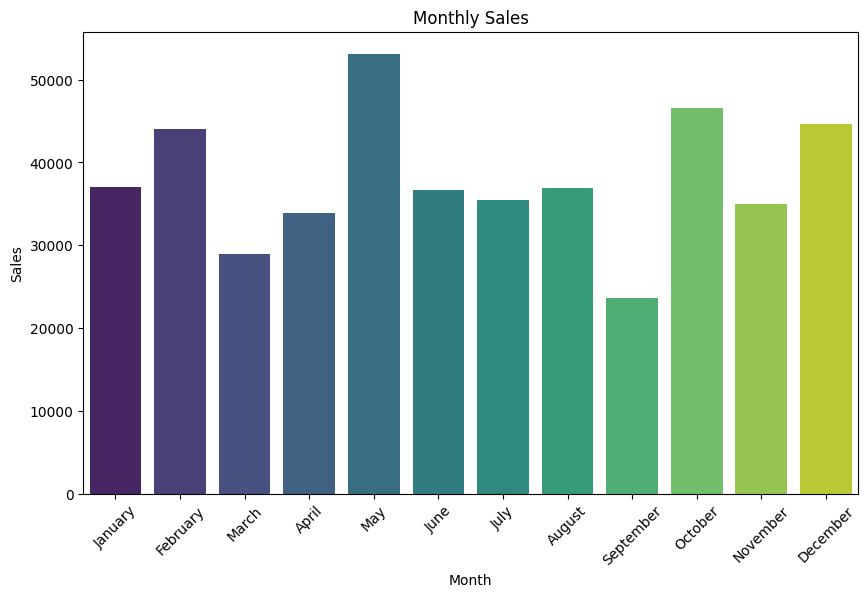

In [168]:
month_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]
df['Month'] = pd.Categorical(df['Month'],categories=month_order,ordered=True)

group2 = df.groupby('Month', as_index=False,observed = False)['Total Amount'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=group2['Month'], y= group2['Total Amount'], data=group2,hue = "Month",palette='viridis' ,legend = False)

# Set title and labels
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.xticks(rotation = 45)
plt.ylabel('Sales')

# Show the plot
plt.show()


# OBSERVATIONS:May,February,October,December have high sales

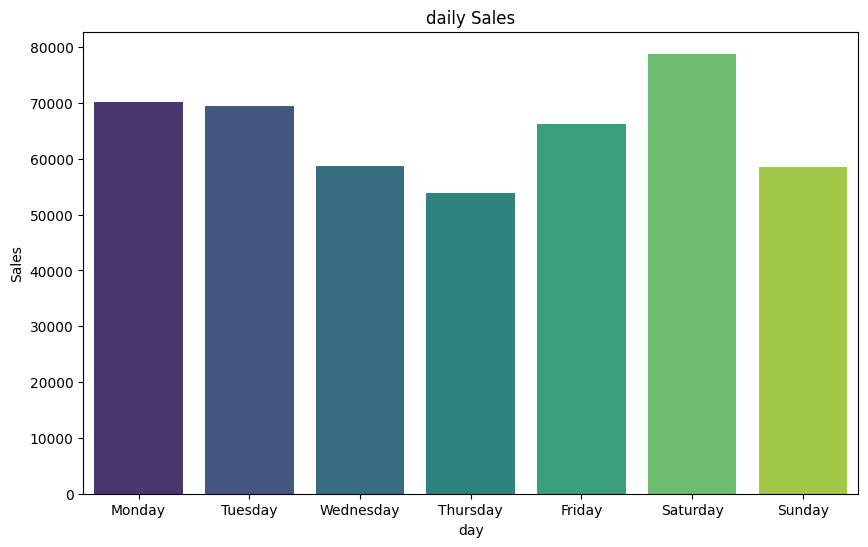

In [182]:


Day_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
df['Day'] = pd.Categorical(df['Day'],categories=Day_order,ordered=True)

group3 = df.groupby('Day',as_index = False,observed = False)['Total Amount'].sum()
plt.figure(figsize=(10, 6))

sns.barplot(x=group3['Day'], y= group3['Total Amount'],hue = group3["Day"],palette = "viridis")


# Set title and labels
plt.title('daily Sales')
plt.xlabel('day')
plt.ylabel('Sales')

# Show the plot
plt.show()

# OBSERVATION:Saturday has highest sales than other days.

In [183]:
df["Year"].unique()

array([2023, 2024], dtype=int32)

In [184]:
df.drop(df[df["Year"] == 2024].index, inplace=True)

In [185]:
df.shape

(998, 13)

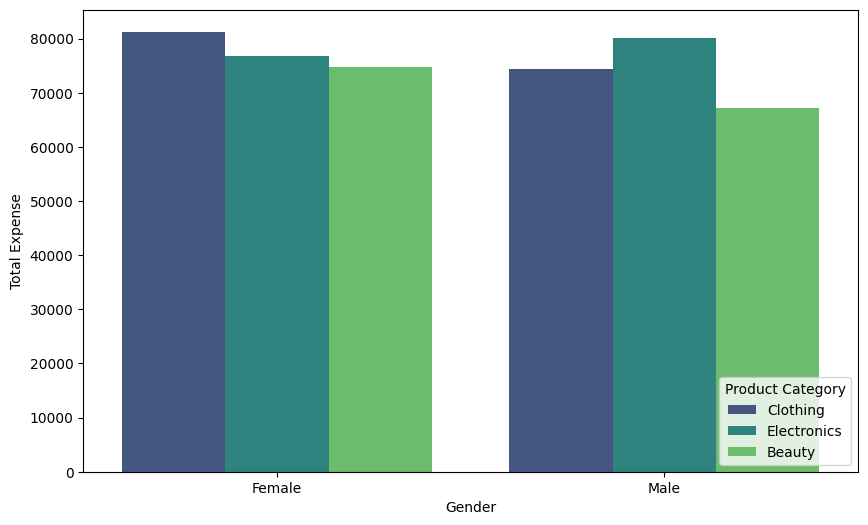

In [215]:
group4 = df.groupby(["Product Category","Gender"])['Total Amount'].sum().reset_index().sort_values(by='Total Amount',ascending=False)
plt.figure(figsize = (10,6))
sns.barplot(data=group4, x='Gender', y='Total Amount',hue = "Product Category",palette = "viridis")
plt.xlabel('Gender')
plt.ylabel('Total Expense')
plt.legend(title = "Product Category",loc = "lower right")

# OBSERVATIONS:Among females clothing is popular and among males Electronic is famous

In [193]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month,day,Day,Age_Bin
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,November,Friday,Friday,30-40
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,February,Monday,Monday,18-30
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,January,Friday,Friday,40-50
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,May,Sunday,Sunday,30-40
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,May,Saturday,Saturday,18-30


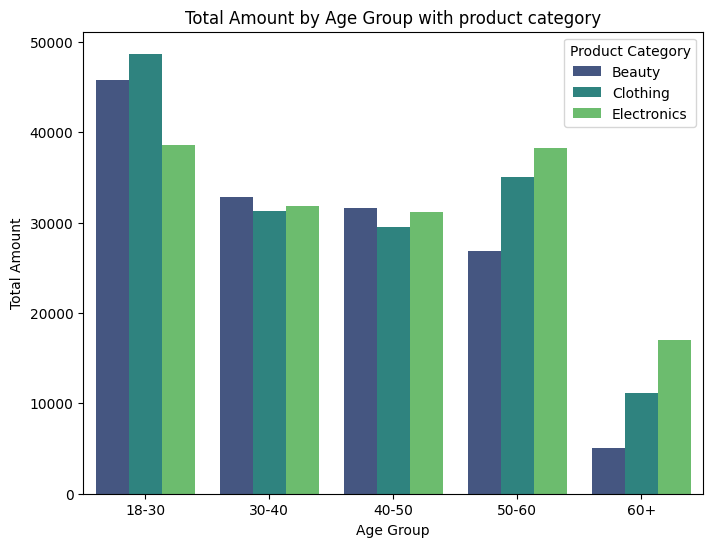

In [218]:
df['Age_Bin'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60,100], 
                          labels=['18-30', '30-40', '40-50','50-60','60+'], 
                          include_lowest=True,ordered = True)

group5 = df.groupby(['Age_Bin',"Product Category"],as_index = False,observed = False)['Total Amount'].sum()

plt.figure(figsize=(8, 6))
sns.barplot(data=group5, x='Age_Bin', y='Total Amount',hue = "Product Category",palette = "viridis")
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.title('Total Amount by Age Group with product category')
plt.show()

# OBSERVATIONS:among 18-30  clothing is popular and after 50 electronics is popular

In [236]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month,day,Day,Age_Bin
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,November,Friday,Friday,30-40
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,February,Monday,Monday,18-30
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,January,Friday,Friday,40-50
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,May,Sunday,Sunday,30-40
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,May,Saturday,Saturday,18-30


In [250]:
group6 = df.groupby(["Month","Product Category"],as_index = False,observed = False)["Total Amount"].sum()
group6

,Month,Product Category,Total Amount
0,January,Beauty,12430
1,January,Clothing,13125
2,January,Electronics,9895
3,February,Beauty,14035
4,February,Clothing,14560
5,February,Electronics,15465
6,March,Beauty,10545
7,March,Clothing,15065
8,March,Electronics,3380
9,April,Beauty,11905


Text(0, 0.5, 'Total Amount')

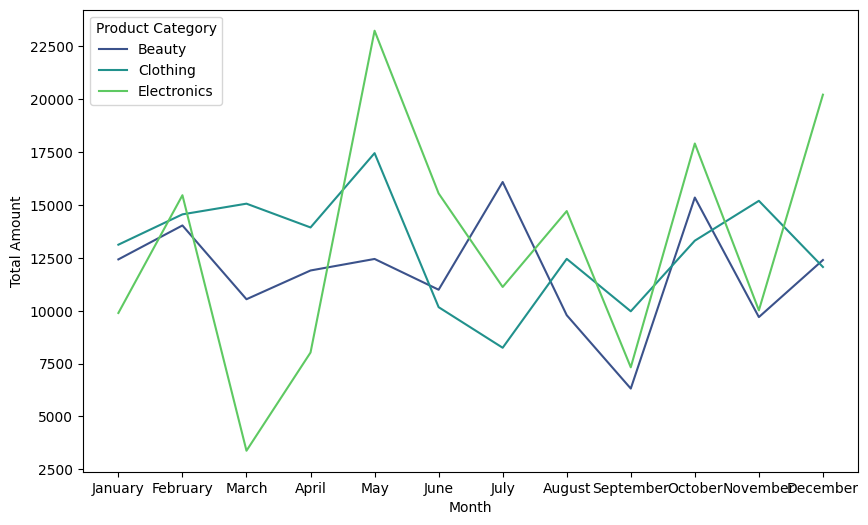

In [253]:
plt.figure(figsize = (10,6))
sns.lineplot(data = group6,x = "Month" ,y = "Total Amount",hue = "Product Category",palette = "viridis")
plt.xlabel("Month")
plt.ylabel("Total Amount")

# OBSERVATIONS:
# Electronics & Clothing  are sold maximum in May Month 
# Beauty Products are sold maximum in July month
# Electronics are sold least in March
# Beauty Products are sold minimum in September month
# Clothing products are sold minimum in July Month

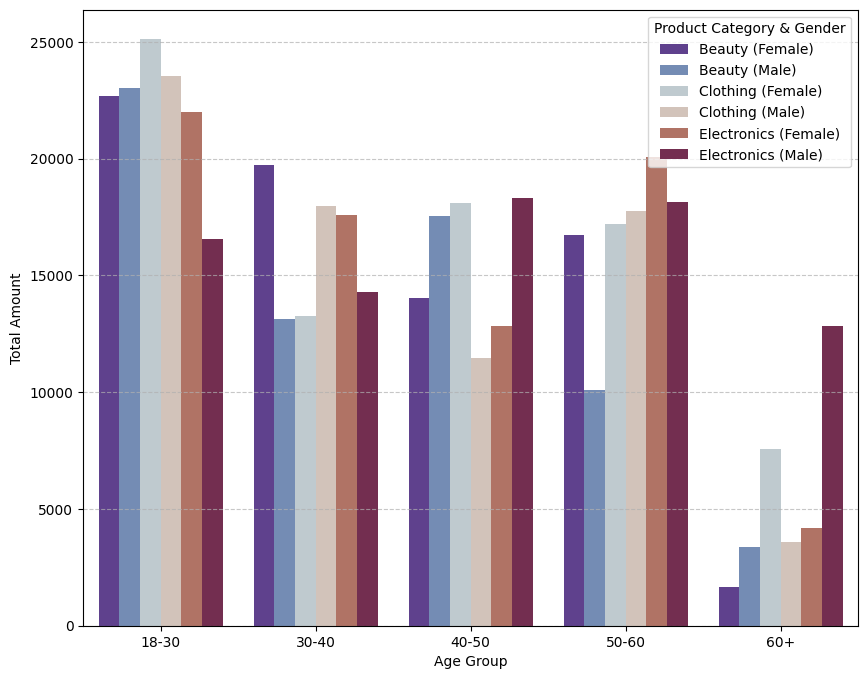

In [249]:
group7=df.groupby(['Age_Bin', 'Product Category', 'Gender'],observed = False)['Total Amount'].sum().reset_index()
group7['Product_Gender'] = group7['Product Category'] + ' (' + group7['Gender'] + ')'

plt.figure(figsize=(10, 8))
sns.barplot(data=group7, x='Age_Bin', y='Total Amount', hue='Product_Gender',palette='twilight_shifted')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.legend(title='Product Category & Gender', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# OBSERVATION:
# Women under 30 spend the most on Clothing
# Women under 40 spend the most on Beauty
# Sale of Beauty products decreases significantly in women aged 60+
# Women in the age group of 50-59 spend the most on Electronics
# Women above 60 spend the least on Beauty and most on Clothing
# Men below 40 tend to spend more on Clothing.
# Men in age groups of 18-29 & 40-49 spend more on Beauty products